# Download dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("artermiloff/steam-games-dataset")

print("Path to dataset files:", path) 

/home/ubuntu/jupyter/jup_notebook/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 201M/201M [00:03<00:00, 65.3MB/s]

Extracting files...


Path to dataset files: /home/ubuntu/.cache/kagglehub/datasets/artermiloff/steam-games-dataset/versions/1


## pindahkan ke direktori kerja 

In [9]:
mv /home/ubuntu/.cache/kagglehub/datasets/artermiloff/steam-games-dataset/versions/1/games_may2024_full.csv ./

# Membuat sesi spark dan membaca dataset 

In [2]:
from pyspark.sql import SparkSession

# Membuat SparkSession
spark = SparkSession.builder \
    .appName("Baca Dataset CSV") \
    .getOrCreate()
# Lokasi file CSV
file_path = "games_may2024_full.csv"

# Membaca CSV ke dalam DataFrame Spark
df = spark.read.csv(file_path, header=True, inferSchema=True)
jb = df.count()
jk = len(df.columns)

## Menampilkan Total jumlah baris,kolom dan 5 data teratas

In [3]:
# Menampilkan skema (struktur dataset) dan jumlah kolom 
print(f" Total Jumlah baris: {jb}")
# Menampilkan jumlah baris dalam dataset
print (f"Total jumlah Kolom :{jk}")
# Menampilkan 5 baris pertama
df.show(5)

 Total Jumlah baris: 87806
Total jumlah Kolom :46


24/12/20 04:05:55 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+------+--------------------+------------+------------+-----+---------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+-------+-----+-----+----------------+--------------------+------------+---------------+--------------------+--------------------+--------------------+--------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+----------------+--------------------+------------------+----------------+--------------------+------------------------+-----------------------+-----------------------+----------------------+--------------------+--------------------+--------------------+--------------------+--------------+------------------+
| AppID|                name|release_date|required_age|price|dlc_count|detailed_description|      about_the_game|   short_description|             reviews|        

## melihat schema dari attribut

In [4]:
df.printSchema()

root
 |-- AppID: integer (nullable = true)
 |-- name: string (nullable = true)
 |-- release_date: string (nullable = true)
 |-- required_age: string (nullable = true)
 |-- price: string (nullable = true)
 |-- dlc_count: double (nullable = true)
 |-- detailed_description: string (nullable = true)
 |-- about_the_game: string (nullable = true)
 |-- short_description: string (nullable = true)
 |-- reviews: string (nullable = true)
 |-- header_image: string (nullable = true)
 |-- website: string (nullable = true)
 |-- support_url: string (nullable = true)
 |-- support_email: string (nullable = true)
 |-- windows: string (nullable = true)
 |-- mac: string (nullable = true)
 |-- linux: string (nullable = true)
 |-- metacritic_score: string (nullable = true)
 |-- metacritic_url: string (nullable = true)
 |-- achievements: string (nullable = true)
 |-- recommendations: string (nullable = true)
 |-- notes: string (nullable = true)
 |-- supported_languages: string (nullable = true)
 |-- full_audi

## Memilih atribut untuk di gunakan 

In [6]:
#memilih atrribut untuk digunakan
df = df.select('AppID','name','release_date','price','categories','detailed_description','developers','publishers')
df.show()
print(f"Jumlah kolom Digunakan: {len(df.columns)}")

+-------+--------------------+------------+-----+--------------------+--------------------+--------------------+--------------------+
|  AppID|                name|release_date|price|          categories|detailed_description|          developers|          publishers|
+-------+--------------------+------------+-----+--------------------+--------------------+--------------------+--------------------+
|    730|    Counter-Strike 2|  2012-08-21|  0.0|['Multi-player', ...|For over two deca...|           ['Valve']|           ['Valve']|
| 578080| PUBG: BATTLEGROUNDS|  2017-12-21|  0.0|['Multi-player', ...|LAND, LOOT, SURVI...|   ['KRAFTON, Inc.']|   ['KRAFTON, Inc.']|
|    570|              Dota 2|  2013-07-09|  0.0|['Multi-player', ...|The most-played g...|           ['Valve']|           ['Valve']|
| 271590|  Grand Theft Auto V|  2015-04-13|  0.0|['Single-player',...|When a young stre...|  ['Rockstar North']|  ['Rockstar Games']|
| 488822|Tom Clancy's Rain...|  2015-12-01|19.99|   'descripti

## identifikasi missing values 

In [80]:
from pyspark.sql.functions import col, sum
# 3. Menghitung Missing Values di Setiap Kolom
missing_values = df.select(
    [(sum(col(c).isNull().cast("int")).alias(c)) for c in df.columns]
).show()

+-----+----+------------+-----+----------+--------------------+----------+----------+
|AppID|name|release_date|price|categories|detailed_description|developers|publishers|
+-----+----+------------+-----+----------+--------------------+----------+----------+
|    0|   3|           0|    0|         1|                4150|         6|         3|
+-----+----+------------+-----+----------+--------------------+----------+----------+



## Menghapus missing value

In [81]:
# Menghapus Baris dengan Missing Values
df = df.na.drop()

# Menampilkan Data Setelah Penghapusan
df .show()

+-------+--------------------+------------+-----+--------------------+--------------------+--------------------+--------------------+
|  AppID|                name|release_date|price|          categories|detailed_description|          developers|          publishers|
+-------+--------------------+------------+-----+--------------------+--------------------+--------------------+--------------------+
|    730|    Counter-Strike 2|  2012-08-21|  0.0|['Multi-player', ...|For over two deca...|           ['Valve']|           ['Valve']|
| 578080| PUBG: BATTLEGROUNDS|  2017-12-21|  0.0|['Multi-player', ...|LAND, LOOT, SURVI...|   ['KRAFTON, Inc.']|   ['KRAFTON, Inc.']|
|    570|              Dota 2|  2013-07-09|  0.0|['Multi-player', ...|The most-played g...|           ['Valve']|           ['Valve']|
| 271590|  Grand Theft Auto V|  2015-04-13|  0.0|['Single-player',...|When a young stre...|  ['Rockstar North']|  ['Rockstar Games']|
| 488822|Tom Clancy's Rain...|  2015-12-01|19.99|   'descripti

## identifikasi ulang missing values 

In [82]:
from pyspark.sql.functions import col, sum
# 3. Menghitung Missing Values di Setiap Kolom
missing_values = df.select(
    [(sum(col(c).isNull().cast("int")).alias(c)) for c in df.columns]
).show()

+-----+----+------------+-----+----------+--------------------+----------+----------+
|AppID|name|release_date|price|categories|detailed_description|developers|publishers|
+-----+----+------------+-----+----------+--------------------+----------+----------+
|    0|   0|           0|    0|         0|                   0|         0|         0|
+-----+----+------------+-----+----------+--------------------+----------+----------+



## Menyimpan data

In [84]:
import shutil
import os

#Tentukan nama folder dan nama file output
nama_path = 'SteamGamesDataset'  # Folder untuk menyimpan data sementara
output_file = 'SteamGames_cleanedMay2024.csv'  # Nama file output yang diinginkan

#Menulis DataFrame ke folder
df.coalesce(1).write.option("header", "true").mode("overwrite").csv(nama_path)

#Menemukan file partisi yang dihasilkan Spark dan memindahkannya ke file output
part_file = next((f for f in os.listdir(nama_path) if f.startswith('part-')), None)

if part_file:
    os.rename(f'{nama_path}/{part_file}', output_file)  # Pindahkan file
    shutil.rmtree(nama_path)  # Hapus folder kosong
    print(f"Folder {nama_path} dihapus")

print(f"Data disimpan dengan nama: {output_file}")

Folder SteamGamesDataset dihapus
Data disimpan dengan nama: SteamGames_cleanedMay2024.csv


In [87]:
ls 

 CNN_3_kelas.ipynb                      etc/
'CNN_model pertama.ipynb'               games_may2024_full.csv
 Download_data_kaggle.ipynb             images/
'Model ANN Workshop.ipynb'              imageslatihan/
 Responsi_235410115_Christian_R.ipynb   lib/
 Responsi_CNN_IFBD_.ipynb               messy-vs-clean-room.zip
 Scraping.ipynb                         pyvenv.cfg
 SteamGames_cleanedMay2024.csv          share/
 Tester.zip                             spark-CNN.ipynb
 appstream.py                           steam.ipynb
 bin/                                   steam_games.csv
 dataset/                              'test spark.ipynb'


# memuat dataset baru

In [1]:
from pyspark.sql import SparkSession

# Membuat SparkSession
spark = SparkSession.builder \
    .appName("Dataset_cleaned") \
    .getOrCreate()
# Lokasi file CSV
df = spark.read.csv("SteamGames_cleanedMay2024.csv", header=True, inferSchema=True)
df.show()

+-------+--------------------+------------+-----+--------------------+--------------------+--------------------+--------------------+
|  AppID|                name|release_date|price|          categories|detailed_description|          developers|          publishers|
+-------+--------------------+------------+-----+--------------------+--------------------+--------------------+--------------------+
|    730|    Counter-Strike 2|  2012-08-21|  0.0|['Multi-player', ...|For over two deca...|           ['Valve']|           ['Valve']|
| 578080| PUBG: BATTLEGROUNDS|  2017-12-21|  0.0|['Multi-player', ...|LAND, LOOT, SURVI...|   ['KRAFTON, Inc.']|   ['KRAFTON, Inc.']|
|    570|              Dota 2|  2013-07-09|  0.0|['Multi-player', ...|The most-played g...|           ['Valve']|           ['Valve']|
| 271590|  Grand Theft Auto V|  2015-04-13|  0.0|['Single-player',...|When a young stre...|  ['Rockstar North']|  ['Rockstar Games']|
| 488822|Tom Clancy's Rain...|  2015-12-01|19.99|   'descripti

## Membuat DataFrame Baru

In [3]:
name_price = df.select('name','price')

In [4]:
name_price .show (25)

+--------------------+-----+
|                name|price|
+--------------------+-----+
|    Counter-Strike 2|  0.0|
| PUBG: BATTLEGROUNDS|  0.0|
|              Dota 2|  0.0|
|  Grand Theft Auto V|  0.0|
|Tom Clancy's Rain...|19.99|
|Tom Clancy's Rain...|19.99|
|Tom Clancy's Rain...|19.99|
|Tom Clancy's Rain...|19.99|
|Tom Clancy's Rain...|19.99|
|     Team Fortress 2|  0.0|
|            Terraria| 9.99|
|         Garry's Mod| 9.99|
|                Rust|39.99|
|       Apex Legends™|  0.0|
|The Witcher® 3: W...| 9.99|
|      Cyberpunk 2077|29.99|
|       Left 4 Dead 2| 9.99|
|       HELLDIVERS™ 2|39.99|
|          ELDEN RING|59.99|
|      Stardew Valley|14.99|
|            Among Us| 4.99|
|           Destiny 2|  0.0|
|            Warframe|  0.0|
|Euro Truck Simula...| 4.99|
|        Phasmophobia|13.99|
+--------------------+-----+
only showing top 25 rows



## Filter menurut Harga dan Nama 

In [5]:
from pyspark.sql.functions import udf, col   
#Memfilter hanya untuk Score dengan nilai 0.0
Free_play = [0.0,13.99,4.99]
df = df.filter(col("price").isin(Free_play))

#Menghitung jumlah setiap score
score_counts = df.groupBy("price").count().orderBy(col("price").desc())

#Menampilkan hasil dalam DataFrame PySpark
score_counts.show()

+-----+-----+
|price|count|
+-----+-----+
| 4.99| 9034|
|13.99|  483|
|  0.0|12702|
+-----+-----+



## Visualisasi Perbandingan 

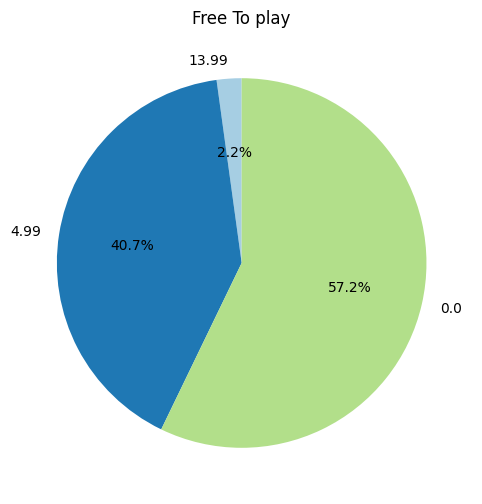

In [6]:
import matplotlib.pyplot as plt

#Memfilter hanya untuk Score dengan nilai 0,0
free_price = [0.0,13.99,4.99]
df = df.filter(col("price").isin(free_price))

#Menghitung jumlah setiap Score
score_counts = df.groupBy("price").count().orderBy(col("count"))

#Mengonversi hasil ke daftar untuk plotting
scores = [row["price"] for row in score_counts.collect()]
counts = [row["count"] for row in score_counts.collect()]

#Membuat diagram pie
plt.figure(figsize=(6,6))
plt.pie(counts, labels=scores, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Free To play 0 $, $ 4.99,13 ")
plt.show()

## Filter berdasarkan price dan name

In [7]:
#filter berdasarkan name dan price
df_baru=df.select('name','price')
df_baru .show()

+--------------------+-----+
|                name|price|
+--------------------+-----+
|    Counter-Strike 2|  0.0|
| PUBG: BATTLEGROUNDS|  0.0|
|              Dota 2|  0.0|
|  Grand Theft Auto V|  0.0|
|     Team Fortress 2|  0.0|
|       Apex Legends™|  0.0|
|            Among Us| 4.99|
|           Destiny 2|  0.0|
|            Warframe|  0.0|
|Euro Truck Simula...| 4.99|
|        Phasmophobia|13.99|
|            Unturned|  0.0|
|         War Thunder|  0.0|
|           Fall Guys|  0.0|
|      Rocket League®|  0.0|
|           Paladins®|  0.0|
|       Geometry Dash| 4.99|
|       Call of Duty®|  0.0|
|  NARAKA: BLADEPOINT|  0.0|
|       Path of Exile|  0.0|
+--------------------+-----+
only showing top 20 rows



## Menyimpan Dataset_baru

In [8]:
import shutil
import os

#Tentukan nama folder dan nama file output
nama_path = 'SteamGamesDataset'  # Folder untuk menyimpan data sementara
output_file = 'NameDanPrice.csv'  # Nama file output yang diinginkan

#Menulis DataFrame ke folder
df.coalesce(1).write.option("header", "true").mode("overwrite").csv(nama_path)

#Menemukan file partisi yang dihasilkan Spark dan memindahkannya ke file output
part_file = next((f for f in os.listdir(nama_path) if f.startswith('part-')), None)

if part_file:
    os.rename(f'{nama_path}/{part_file}', output_file)  # Pindahkan file
    shutil.rmtree(nama_path)  # Hapus folder kosong
    print(f"Folder {nama_path} dihapus")

print(f"Data disimpan dengan nama: {output_file}")

Folder SteamGamesDataset dihapus
Data disimpan dengan nama: NameDanPrice.csv
